<a href="https://colab.research.google.com/github/vidukesh84/PGP_AIML/blob/master/Question_Notebook_Recomm_Sys_NEW_lab%20Vidhukesh%20Vimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [104]:
!pip install surprise

     |████████████████████████████████| 11.8MB 4.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618282 sha256=6cd0acffe41d020f0d767a2480cf7f5a990f87002400109b2479ae42e834d511
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [11]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [10, 8]
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import math
import seaborn as sns


# set seed for reproducibility
np.random.seed(0)

In [14]:
import os
os.getcwd()

'/content'

In [16]:
os.chdir('/content/drive/MyDrive/sample_data')

In [17]:
os.getcwd()

'/content/drive/My Drive/sample_data'

2. Loading the Data 

In [18]:
df_items = pd.read_csv('item_description.csv')
df_ratings = pd.read_csv('item_ratings.csv')
df_users = pd.read_csv('user_preferences.csv')


3. Data Analysis and EDA

3.1 Items Data 
Q. Check the info of the Item_description data and dwrite your comments 

In [19]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   itemId    18 non-null     int64 
 1   itemDesc  18 non-null     object
 2   item1     18 non-null     int64 
 3   item2     18 non-null     int64 
 4   item3     18 non-null     int64 
 5   item4     18 non-null     int64 
 6   item5     18 non-null     int64 
 7   item6     18 non-null     int64 
 8   item7     18 non-null     int64 
 9   item8     18 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


In [22]:
df_items.shape

(18, 10)

In [23]:
df_items

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0
5,6,A discount for your favorite bookshop,0,0,0,1,0,0,0,0
6,7,A discount for your favorite pub,0,0,0,0,1,0,0,0
7,8,A discount for your favorite restaurant,0,0,0,0,1,0,0,0
8,9,An exhibition about your favorite author,0,0,0,1,0,0,0,0
9,10,"The time of your next bus, tram, or subway (in...",0,0,0,0,0,1,0,0


Q. Make a Column called item category and add it to the items dataframe

In [24]:
df_items['cat'] = [1,1,2,2,3,4,5,5,4,6,6,7,7,6,8,8,8,7]

In [38]:
df_items

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8,cat
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0,1
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0,1
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0,2
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0,2
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0,3
5,6,A discount for your favorite bookshop,0,0,0,1,0,0,0,0,4
6,7,A discount for your favorite pub,0,0,0,0,1,0,0,0,5
7,8,A discount for your favorite restaurant,0,0,0,0,1,0,0,0,5
8,9,An exhibition about your favorite author,0,0,0,1,0,0,0,0,4
9,10,"The time of your next bus, tram, or subway (in...",0,0,0,0,0,1,0,0,6


In [39]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   contextId  38736 non-null  int64
 1   itemId     38736 non-null  int64
 2   rating     38736 non-null  int64
 3   userId     38736 non-null  int64
 4   context    38736 non-null  int64
dtypes: int64(5)
memory usage: 1.5 MB


All integer values, 38736 null values, there are multiple userids 

In [40]:
df_ratings['rating'].value_counts()

0    26653
1    12083
Name: rating, dtype: int64

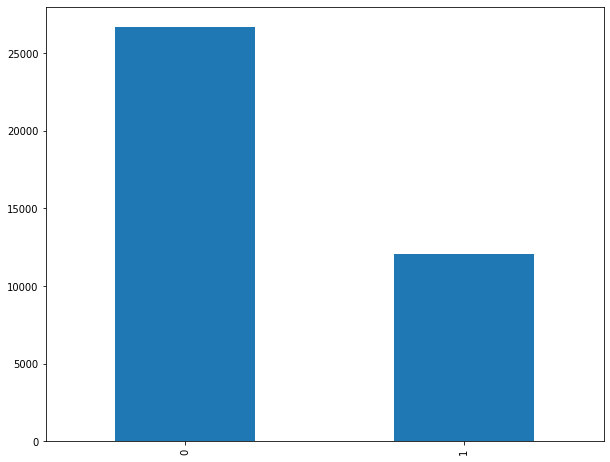

In [41]:
df_ratings['rating'].value_counts().plot(kind='bar')

Q- Make a column called context and add two weather (context) to it. Context =1 for contextId <1077 and Context=0 for contextId >1076

In [42]:
df_ratings['context'] = df_ratings['contextId'].apply(lambda x : 1 if x < 1077 else 0)
# df_ratings['Context'] = np.where(df_ratings['contextId']<1077,1,0)

In [43]:
df_ratings

,contextId,itemId,rating,userId,context
0,1,1,1,1,1
1,1,2,1,1,1
2,1,3,0,1,1
3,1,4,0,1,1
4,1,5,0,1,1
...,...,...,...,...,...
38731,2152,14,0,1076,0
38732,2152,15,0,1076,0
38733,2152,16,0,1076,0
38734,2152,17,0,1076,0


Q- Check crosstab between context and rating and see if weather has any significant contribution

In [44]:
pd.crosstab(df_ratings.context, df_ratings.rating)

rating,0,1
context,,
0,13550,5818
1,13103,6265


Q- Check for null values

In [45]:
df_ratings.isnull().values.any()

False

Q- Check unique users, items, and contextId in the data

In [46]:
df_ratings.nunique()


contextId    2152
itemId         18
rating          2
userId       1076
context         2
dtype: int64

In [47]:
print("users unique counts:", df_ratings['userId'].nunique())
print("Items unique counts:", df_ratings['itemId'].nunique())
print("Ratings unique counts:", df_ratings['rating'].nunique())

users unique counts: 1076
Items unique counts: 18
Ratings unique counts: 2


### Popularity Based
Q- Check mean rating for each item and print the top 10 popular items

In [48]:
df_ratings.groupby('itemId').mean()['rating'].sort_values(ascending=False).head(10)


itemId
7     0.592472
10    0.559480
8     0.542286
11    0.428439
5     0.395911
3     0.368959
6     0.339219
13    0.332714
14    0.289498
12    0.276487
Name: rating, dtype: float64

In [49]:
df_ratings.groupby('itemId', as_index=False)['rating'].mean().sort_values(by = 'rating' ,ascending = False).head(10)


,itemId,rating
6,7,0.592472
9,10,0.559480
7,8,0.542286
10,11,0.428439
4,5,0.395911
2,3,0.368959
5,6,0.339219
12,13,0.332714
13,14,0.289498
11,12,0.276487


Q- Report the most liked and least liked item

In [50]:
print("Most Liked: ",df_ratings.groupby('itemId')['rating'].mean().sort_values(ascending=False).head(1))
print("Least Liked: ",df_ratings.groupby('itemId')['rating'].mean().sort_values(ascending=True).head(1))


Most Liked:  itemId
7    0.592472
Name: rating, dtype: float64
Least Liked:  itemId
15    0.110595
Name: rating, dtype: float64


Q- Check the mean rating of each user and print top users (who have highest mean rating)

In [51]:
df_ratings.groupby('userId', as_index=False)['rating'].mean().sort_values(by = 'rating' ,ascending = False).head(10)

,userId,rating
265,266,1.000000
947,948,1.000000
579,580,1.000000
263,264,0.805556
1022,1023,0.805556
643,644,0.805556
523,524,0.805556
974,975,0.805556
875,876,0.805556
482,483,0.777778


Q- Check distribution of mean rating

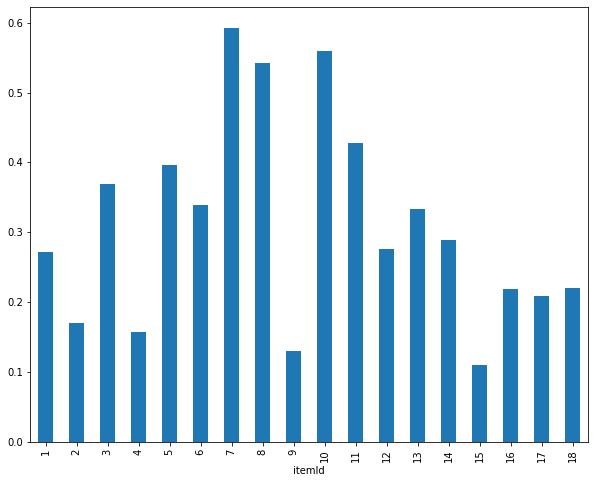

In [52]:
df_ratings.groupby('itemId').mean()['rating'].plot(kind='bar')

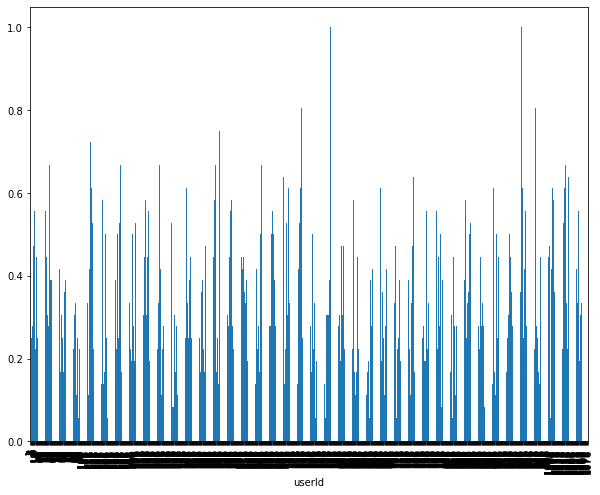

In [53]:
df_ratings.groupby('userId').mean()['rating'].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd425d94400>]],
      dtype=object)

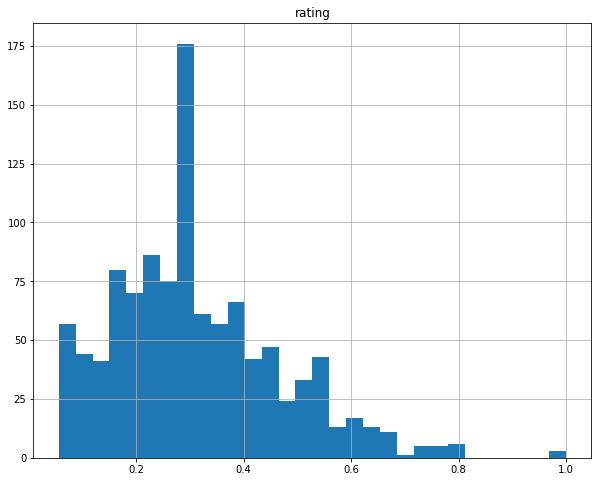

In [54]:
avg_rating_user = df_ratings[['userId', 'rating']].groupby('userId').agg('mean').sort_values(by = 'rating', ascending=False)
avg_rating_user.hist(bins=30)


In [55]:
item_rating = pd.DataFrame(df_ratings.groupby('userId')['rating'].mean())

In [56]:
df_ratings.columns

Index(['contextId', 'itemId', 'rating', 'userId', 'context'], dtype='object')

In [57]:
df_items.columns

Index(['itemId', 'itemDesc', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8', 'cat'],
      dtype='object')

Q- Add a column called item_cat having item category 

In [58]:
df_ratings['item_cat'] = df_ratings['itemId'].replace(df_items['item_category'])

KeyError: ignored

Q- Plot a boxplot between rating and item_cat

### 3.3 User Preferences Data

Q- Check info and shape of the user_preferences data

In [59]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   contextId         2152 non-null   int64
 1   age               2152 non-null   int64
 2   man               2152 non-null   int64
 3   woman             2152 non-null   int64
 4   SPC1              2152 non-null   int64
 5   SPC2              2152 non-null   int64
 6   SPC3              2152 non-null   int64
 7   SPC4              2152 non-null   int64
 8   SPC5              2152 non-null   int64
 9   SPC6              2152 non-null   int64
 10  SPC7              2152 non-null   int64
 11  SPC8              2152 non-null   int64
 12  SPC9              2152 non-null   int64
 13  SPC10             2152 non-null   int64
 14  SPC11             2152 non-null   int64
 15  SPC12             2152 non-null   int64
 16  SPC13             2152 non-null   int64
 17  userSpecialty1    2152 non-null  

In [60]:
df_users.shape

(2152, 51)

Q- Check the frequency distribution of "man" column

In [61]:
df_users['man'].value_counts()

1    1302
0     850
Name: man, dtype: int64

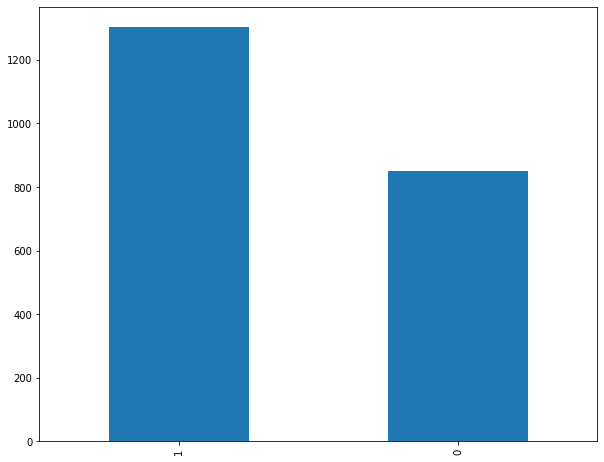

In [62]:
df_users['man'].value_counts().plot(kind='bar')

Q- Check the frequency distribution of "age" column

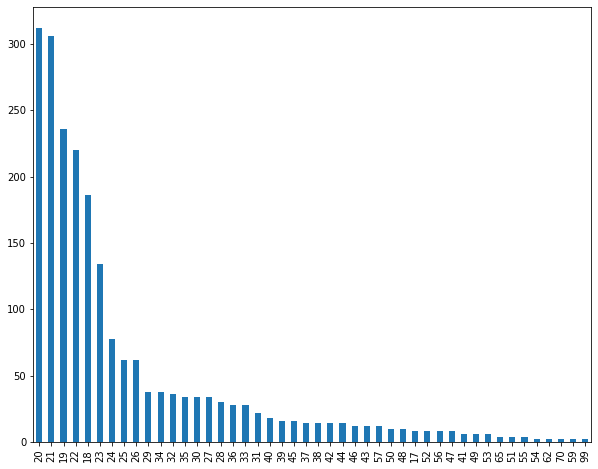

In [63]:
df_users['age'].value_counts().plot(kind='bar')

Q- Plot a boxplot between "man" and "age"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


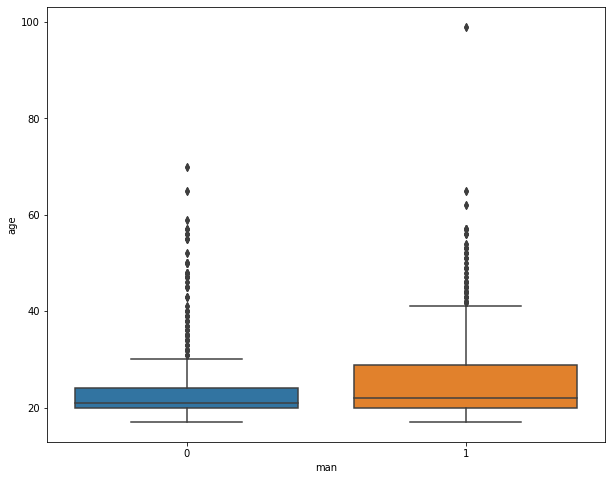

In [64]:
sns.boxplot(df_users['man'],df_users['age'])

Q- Drop redundant features like "woman", "contextId", "userId", "weatherSeason1"

In [65]:
users=df_users.drop(['woman','contextId','userId','weatherSeason1'], axis = 1)

Q- Standardize the age column and keep the remaining column as it is

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

column_trans = ColumnTransformer([('scaler', StandardScaler(),['age'])], remainder='passthrough') 
data = column_trans.fit_transform(users)

data = pd.DataFrame(data, columns= users.columns)
data.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.996064,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.669029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


import pandas as pd
from sklearn.preprocessing import StandardScaler 
std_scaler=StandardScaler()
preference_red[["age"]] = std_scaler.fit_transform(preference_red[["age"]])

Q- Replace the columns with the frequency of the value (0,1) instead of value for all the columns having binary values. Columns (age, man, weatherSeason2) remain as it is

In [67]:
data.shape

(2152, 47)

In [68]:
for i in data.columns[2:-1]:
  freq = ((data.groupby(i).size()) /len(data))
  data[i] = data[i].apply(lambda x:freq[x])

In [69]:
data.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
1,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.593866,0.614312,0.610595,0.16171,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
2,1.996064,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.406134,0.385688,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
3,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.406134,0.614312,0.389405,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
4,2.669029,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.077138,0.986989,0.082714,0.406134,0.344796,0.795539,0.467472,0.406134,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0


In [70]:
##data.drop('SPC2','SPC5', axis=1)

Q- Let's apply clustering to see if we can segment users into some clusters given their feature preferences.
Apply K-means clustering and plot an elbow plot to come up with an appropriate number of clusters

In [71]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


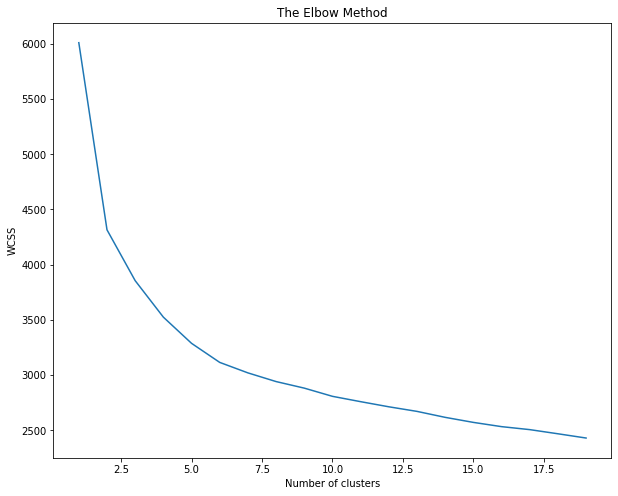

In [72]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Q- Check the silhouette score for a few clusters

In [73]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5, 6,7,8,9, 10, 11, 12, 15,17]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))


For n_clusters = 2, silhouette score is 0.3704091139796633)
For n_clusters = 3, silhouette score is 0.15973315671894545)
For n_clusters = 4, silhouette score is 0.15522824241501837)
For n_clusters = 5, silhouette score is 0.14463956992614516)
For n_clusters = 6, silhouette score is 0.16807346508738433)
For n_clusters = 7, silhouette score is 0.16241574058690872)
For n_clusters = 8, silhouette score is 0.16220546729615243)
For n_clusters = 9, silhouette score is 0.15117540492122197)
For n_clusters = 10, silhouette score is 0.1532529994360831)
For n_clusters = 11, silhouette score is 0.15259893077787415)
For n_clusters = 12, silhouette score is 0.14103722252867665)
For n_clusters = 15, silhouette score is 0.1260833260489657)
For n_clusters = 17, silhouette score is 0.12798895919900205)


Q- Fit the cluster using the appropriate K

In [74]:
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter=100)
kmeans = kmeans.fit(data)

Q- Add the cluster label to the original dataframe

In [75]:
df_users['cluster_value']=kmeans.labels_

Q- Check for a few user if they belong to the same cluster or not

In [76]:
df_users.head(5)

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster_value
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2,1
2,3,43,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,1
3,4,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1
4,5,49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,5,1


## 4. Data Preparation

Let's merge the datasets into one dataframe now. Item data does not have any additional information.
We will merge item_rating and user_description.

Q- Drop contextID from the item_ratings

In [77]:
df_items.head(2)

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8,cat
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0,1
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0,1


In [78]:
df_ratings = df_ratings.drop(['contextId'], axis=1)

Q- Drop columns like 'contextId', 'woman','weatherSeason1' or use the above processed dataframe

In [79]:
data.head(5)

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
1,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.593866,0.614312,0.610595,0.16171,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
2,1.996064,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.406134,0.385688,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
3,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.406134,0.614312,0.389405,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
4,2.669029,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.077138,0.986989,0.082714,0.406134,0.344796,0.795539,0.467472,0.406134,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0


Let's make one dataframe having userId, itemId, itemCat, context/weather, user spcs, and user cluster label.

- We dont need df_items dataframe
- We will join df_ratings (context, itemId, userId, rating) and df_users (spc, cluster label)

In [80]:
user_data = df_users.drop(['contextId','woman','weatherSeason1','weatherSeason2'], axis =1)

In [81]:
user_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2147     True
2148     True
2149     True
2150     True
2151     True
Length: 2152, dtype: bool

In [82]:
user_data[user_data['userId']==1]

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster_value
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1
1076,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1


In [83]:
user_unique = user_data.drop_duplicates()
user_unique.shape

(1076, 48)

Q- Merge ratings dataframe and user dataframe on userId

In [84]:
dff = pd.merge(df_ratings, user_unique, how='inner', on='userId')
dff.shape

(38736, 51)

In [86]:
item_cat = {1: 1,  2:1, 3: 2, 4:2, 5:3, 6:4, 7:5, 8:5, 9:4, 10:6, 11:6, 12:7, 13:7, 14:6, 15:8, 16:8, 17:8, 18:7 }
df_ratings['item_cat'] = df_ratings['itemId'].replace(item_cat)


In [87]:
user_unique.columns

Index(['age', 'man', 'SPC1', 'SPC2', 'SPC3', 'SPC4', 'SPC5', 'SPC6', 'SPC7',
       'SPC8', 'SPC9', 'SPC10', 'SPC11', 'SPC12', 'SPC13', 'userSpecialty1',
       'userSpecialty2', 'userSpecialty3', 'userSpecialty4', 'userSpecialty5',
       'userSpecialty6', 'userSpecialty7', 'userSpecialty8', 'userSpecialty9',
       'userSpecialty10', 'userSpecialty11', 'userSpecialty12',
       'userSpecialty13', 'userPreference1', 'userPreference2',
       'userPreference3', 'userPreference4', 'userPreference5',
       'userPreference6', 'userPreference7', 'userPreference8',
       'userPreference9', 'userPreference10', 'userHighDegree1',
       'userHighDegree2', 'userHighDegree3', 'userHighDegree4',
       'userHighDegree5', 'userHighDegree6', 'userHighDegree7',
       'userHighDegree8', 'userId', 'cluster_value'],
      dtype='object')

In [88]:
dff.shape

(38736, 51)

In [89]:
item_cat = {1: 1,  2:1, 3: 2, 4:2, 5:3, 6:4, 7:5, 8:5, 9:4, 10:6, 11:6, 12:7, 13:7, 14:6, 15:8, 16:8, 17:8, 18:7 }
df_ratings['item_cat'] = df_ratings['itemId'].replace(item_cat)
user_data[user_data.duplicated()].shape
(38736, 52)


(38736, 52)

In [90]:
dff = pd.merge(df_ratings, user_unique, how='inner', on='userId')
dff.shape

(38736, 52)

In [91]:
user_unique.columns

Index(['age', 'man', 'SPC1', 'SPC2', 'SPC3', 'SPC4', 'SPC5', 'SPC6', 'SPC7',
       'SPC8', 'SPC9', 'SPC10', 'SPC11', 'SPC12', 'SPC13', 'userSpecialty1',
       'userSpecialty2', 'userSpecialty3', 'userSpecialty4', 'userSpecialty5',
       'userSpecialty6', 'userSpecialty7', 'userSpecialty8', 'userSpecialty9',
       'userSpecialty10', 'userSpecialty11', 'userSpecialty12',
       'userSpecialty13', 'userPreference1', 'userPreference2',
       'userPreference3', 'userPreference4', 'userPreference5',
       'userPreference6', 'userPreference7', 'userPreference8',
       'userPreference9', 'userPreference10', 'userHighDegree1',
       'userHighDegree2', 'userHighDegree3', 'userHighDegree4',
       'userHighDegree5', 'userHighDegree6', 'userHighDegree7',
       'userHighDegree8', 'userId', 'cluster_value'],
      dtype='object')

In [92]:
dff.head(2)

,itemId,rating,userId,context,item_cat,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,cluster_value
0,1,1,1,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
1,2,1,1,1,1,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


Q- Make X and y data. Keep rating in y.
Drop Ids and ratings from X data

In [93]:
X= dff.drop(['itemId','userId','rating'], axis=1)
y= dff['rating']

In [94]:
y.value_counts()

0    26653
1    12083
Name: rating, dtype: int64

## 5. Model Building - Classification

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

#Model 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Accuracy
model_Train = model.score(X_train, y_train)
model_Test = model.score(X_test, y_test)

Pred = model.predict(X_test)
Recall = recall_score(y_test,Pred, average="binary",pos_label=1)

print(model_Train)
print(model_Test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,Pred))

0.881910381707542
0.7089751312279494
Confusion Matrix:
 [[6617 1440]
 [1942 1622]]


In [101]:
resultsDf = pd.DataFrame({'Method':['Decision'],'Train Accuracy' : model_Train, 'Test Accuracy' : model_Test, 'Recall' : Recall})
resultsDf = resultsDf[['Method','Train Accuracy', 'Test Accuracy', 'Recall']]
resultsDf

,Method,Train Accuracy,Test Accuracy,Recall
0,Decision,0.88191,0.708975,0.455107


## 6. Model Building - Collaborative Filtering

In [102]:
df_final = dff[['itemId','userId','context','rating']]
df_final.head(2)

,itemId,userId,context,rating
0,1,1,1,1
1,2,1,1,1


In [106]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, 1))

data = Dataset.load_from_df(df_final[['userId','itemId','rating']],reader)

In [108]:
#split data to train and test 
from surprise.model_selection import train_test_split

trainset, testset= train_test_split(data, test_size=.3, random_state=123)

In [109]:
svd_model = SVD(n_factors=50, biased=False)
svd_model.fit(trainset)
test_pred = svd_model.test(testset)

In [110]:
test_pred[:10]

[Prediction(uid=554, iid=10, r_ui=1.0, est=0.3861677116310816, details={'was_impossible': False}),
 Prediction(uid=972, iid=17, r_ui=0.0, est=0.17777207784702723, details={'was_impossible': False}),
 Prediction(uid=293, iid=13, r_ui=0.0, est=0.04445032268126772, details={'was_impossible': False}),
 Prediction(uid=748, iid=1, r_ui=0.0, est=0.25036095666456937, details={'was_impossible': False}),
 Prediction(uid=991, iid=8, r_ui=0.0, est=0.31633333493226196, details={'was_impossible': False}),
 Prediction(uid=460, iid=3, r_ui=1.0, est=0.3500006275563998, details={'was_impossible': False}),
 Prediction(uid=606, iid=12, r_ui=0.0, est=0.16826306414925038, details={'was_impossible': False}),
 Prediction(uid=915, iid=18, r_ui=0.0, est=0.19573012664828812, details={'was_impossible': False}),
 Prediction(uid=362, iid=12, r_ui=0.0, est=0.13629645035703963, details={'was_impossible': False}),
 Prediction(uid=1047, iid=14, r_ui=0.0, est=0.09739314522972667, details={'was_impossible': False})]

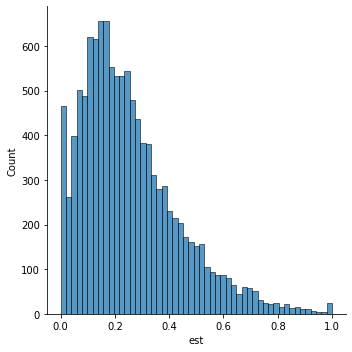

In [114]:
pred_df= pd.DataFrame(test_pred)
sns.displot(pred_df['est'])

In [111]:
#Computer RMSE
accuracy.rmse(test_pred)

RMSE: 0.4270


0.4269580374684274

In [112]:
#compute RMSE
accuracy.mae(test_pred)

MAE:  0.3398


0.339807351890259

In [113]:
accuracy.fcp(test_pred)

FCP:  0.6858


0.6858010870855761

In [126]:
from surprise.model_selection import cross_validate, train_test_split
from surprise import SVD, Dataset, Reader, KNNWithMeans
benchmark = []

for algorithm in [SVD(), KNNWithMeans(k=20)]:
  results= cross_validate(algorithm, data, measures=['RMSE'],cv=5,verbose=False)

  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
  benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,0.385258,1.187060,8.373416
SVD,0.414111,1.786036,0.052178


## 7. Prediction and Recommendation

In [117]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n



In [118]:
top_n = get_top_n(test_pred, n=10)
#print the recommended items for each user
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, _) in user_ratings])

554 [10, 7, 7, 11, 5, 18, 18, 3, 16, 16]
972 [7, 8, 3, 5, 17, 16, 2, 1, 9]
293 [7, 14, 14, 10, 18, 1, 1, 12, 17, 9]
748 [7, 10, 3, 11, 13, 12, 1, 4, 17, 9]
991 [8, 7, 5, 6, 13, 12, 1, 18, 9, 16]
460 [10, 8, 7, 11, 3, 3, 6, 6, 1, 16]
606 [7, 7, 6, 5, 5, 13, 1, 16, 2, 2]
915 [7, 5, 11, 13, 6, 12, 14, 18, 18, 17]
362 [7, 11, 11, 5, 3, 3, 17, 12, 12]
1047 [8, 8, 5, 14, 13, 4, 12, 2]
1011 [8, 10, 11, 11, 14, 3, 13, 1, 6, 9]
768 [7, 11, 3, 3, 6, 6, 5, 14, 9, 9]
250 [10, 5, 3, 11, 11, 12, 12, 13, 1, 18]
263 [7, 5, 10, 13, 6, 14, 1, 12, 12, 16]
612 [7, 12, 5, 17, 17, 14, 9, 4]
626 [10, 8, 11, 13, 13, 12, 12, 16, 4, 4]
416 [10, 7, 5, 3, 13, 14, 14, 12, 1, 1]
834 [8, 7, 6, 11, 10, 13, 12, 1, 1, 18]
505 [7, 7, 8, 10, 5, 13, 12, 3, 11, 6]
521 [10, 11, 8, 12, 5, 3, 17, 6, 18, 9]
665 [7, 8, 5, 9, 18, 18, 17, 6, 3, 14]
997 [7, 3, 14, 14, 13, 13, 6, 18, 17, 2]
1052 [3, 11, 11, 12, 14, 6, 5, 2, 15]
843 [3, 14, 13, 10, 8, 1, 17, 16, 6, 2]
137 [10, 11, 13, 13, 6, 3, 12, 12, 1, 2]
408 [8, 7, 7, 5, 5, 3, 3

## 8. Conclusion and Interpretation

A simple classification model is not performing well because we do not have item features and the user features were not informative or different from each other 

user item relationship is not being accounted in the simple classification model 

Surprise does not provide a model to build a classification model thus we used SVD to predict raitings of 0 or 1

Context info is not getting accounted in  the SVD collaborative model but since we have different raitings for different context it may have been captured by the SVD 

we have recommended top 10 items to a user based on the users likeness for an item 